In [1]:
import anndata as ad
import scanpy as sc

# SCLC Immune Cells

Download 'SCLC immune cells' h5ad file from https://cellxgene.cziscience.com/collections/62e8f058-9c37-48bc-9200-e767f318a8ec.
Re-clustered using using standard Scanpy workflow.

In [5]:
immune_orig = sc.read_h5ad("4a0483b7-7192-4bf4-b948-ed785f1778ab.h5ad")

In [4]:
immune_orig

AnnData object with n_obs × n_vars = 16475 × 25090
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'mito_frac', 'RBP_frac', 'batch', 'donor_id', 'treatment', 'procedure', 'author_cell_type', 'cell_type_broad', 'clusters', 'treatment_categorized', 'subtype', 'H_treatment', 'H_subtype', 'cell_type_ontology_term_id', 'tissue_ontology_term_id', 'disease_ontology_term_id', 'organism_ontology_term_id', 'is_primary_data', 'development_stage_ontology_term_id', 'assay_ontology_term_id', 'sex_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'suspension_type', 'HTAN_Biospecimen_ID', 'HTAN_Participant_ID', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype'
    uns: 'neighbors', 'schema_version', 'title'
    obsm: 'X_pca', 'X_umap'
    layers: 'log2(X+0.1)', 'normalized'
    obsp: 'connectivities

### Normalize and cluster
Set var index to gene symbols. Normalize and scale data.

In [6]:
adata = ad.AnnData(X=immune_orig.raw.X, obs=immune_orig.obs, var=immune_orig.raw.var)
adata.var['ensembl_ID'] = adata.var.index
adata.var.set_index('feature_name', inplace=True)

In [7]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5, n_top_genes=2000)

/Users/jychien/miniconda3/envs/census/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:215: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


In [8]:
adata.raw = adata
adata = adata[:, adata.var.highly_variable]
sc.pp.scale(adata, max_value=10)
sc.tl.pca(adata, svd_solver='arpack')

/Users/jychien/miniconda3/envs/census/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/Users/jychien/miniconda3/envs/census/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:842: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/Users/jychien/miniconda3/envs/census/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


## Cluster and visualize

In [10]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=50)
sc.tl.umap(adata)
sc.tl.leiden(adata)

/Users/jychien/miniconda3/envs/census/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/Users/jychien/miniconda3/envs/census/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/Users/jychien/miniconda3/envs/census/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


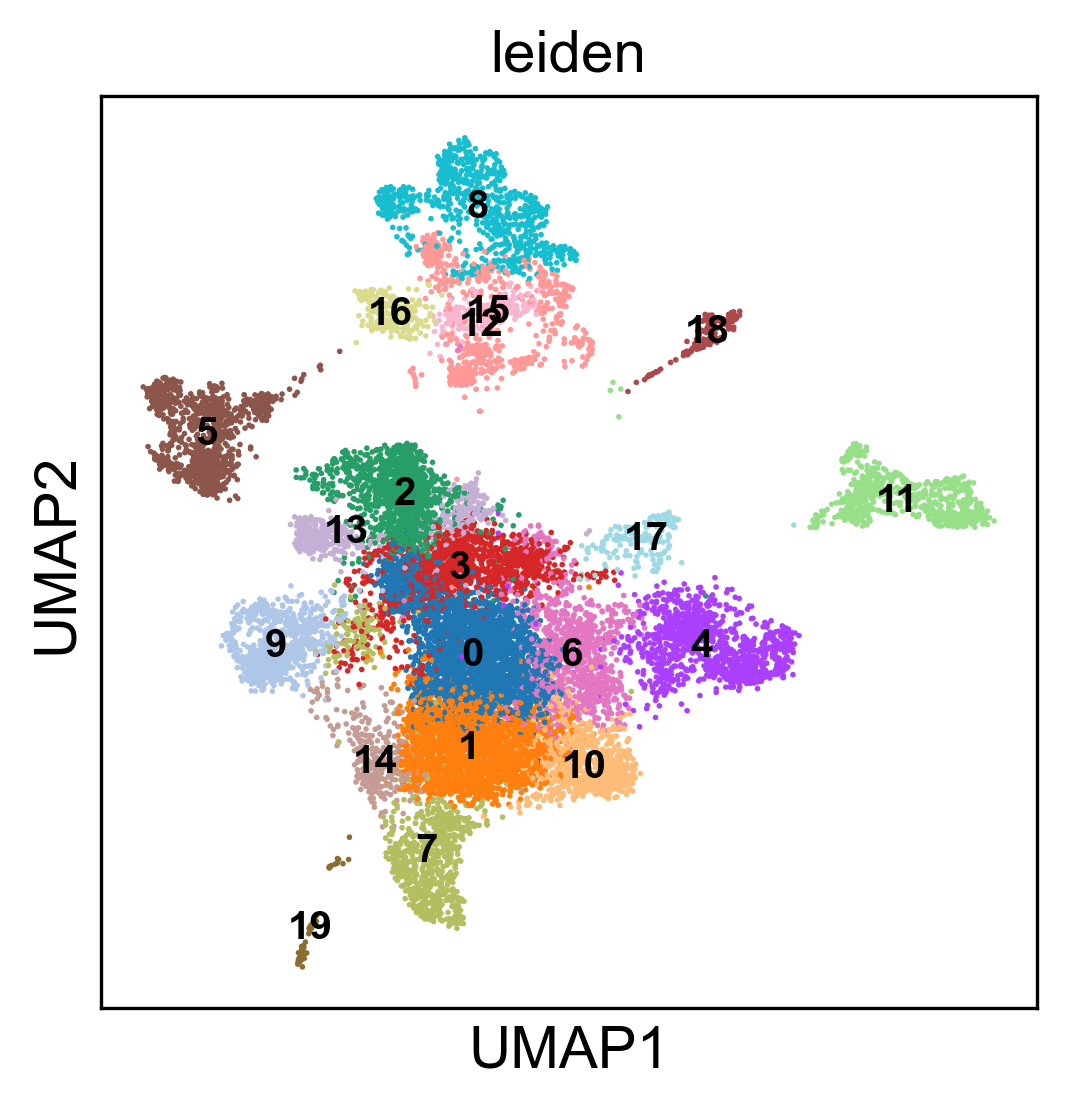

In [12]:
sc.set_figure_params(dpi=150)
sc.pl.umap(adata, color=['leiden'], legend_fontsize='x-small', legend_loc='on data')

/Users/jychien/miniconda3/envs/census/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/Users/jychien/miniconda3/envs/census/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/Users/jychien/miniconda3/envs/census/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/jychien/miniconda3/envs/census/lib/python3.9/site-packages/scanpy/plotting/_tools/sc

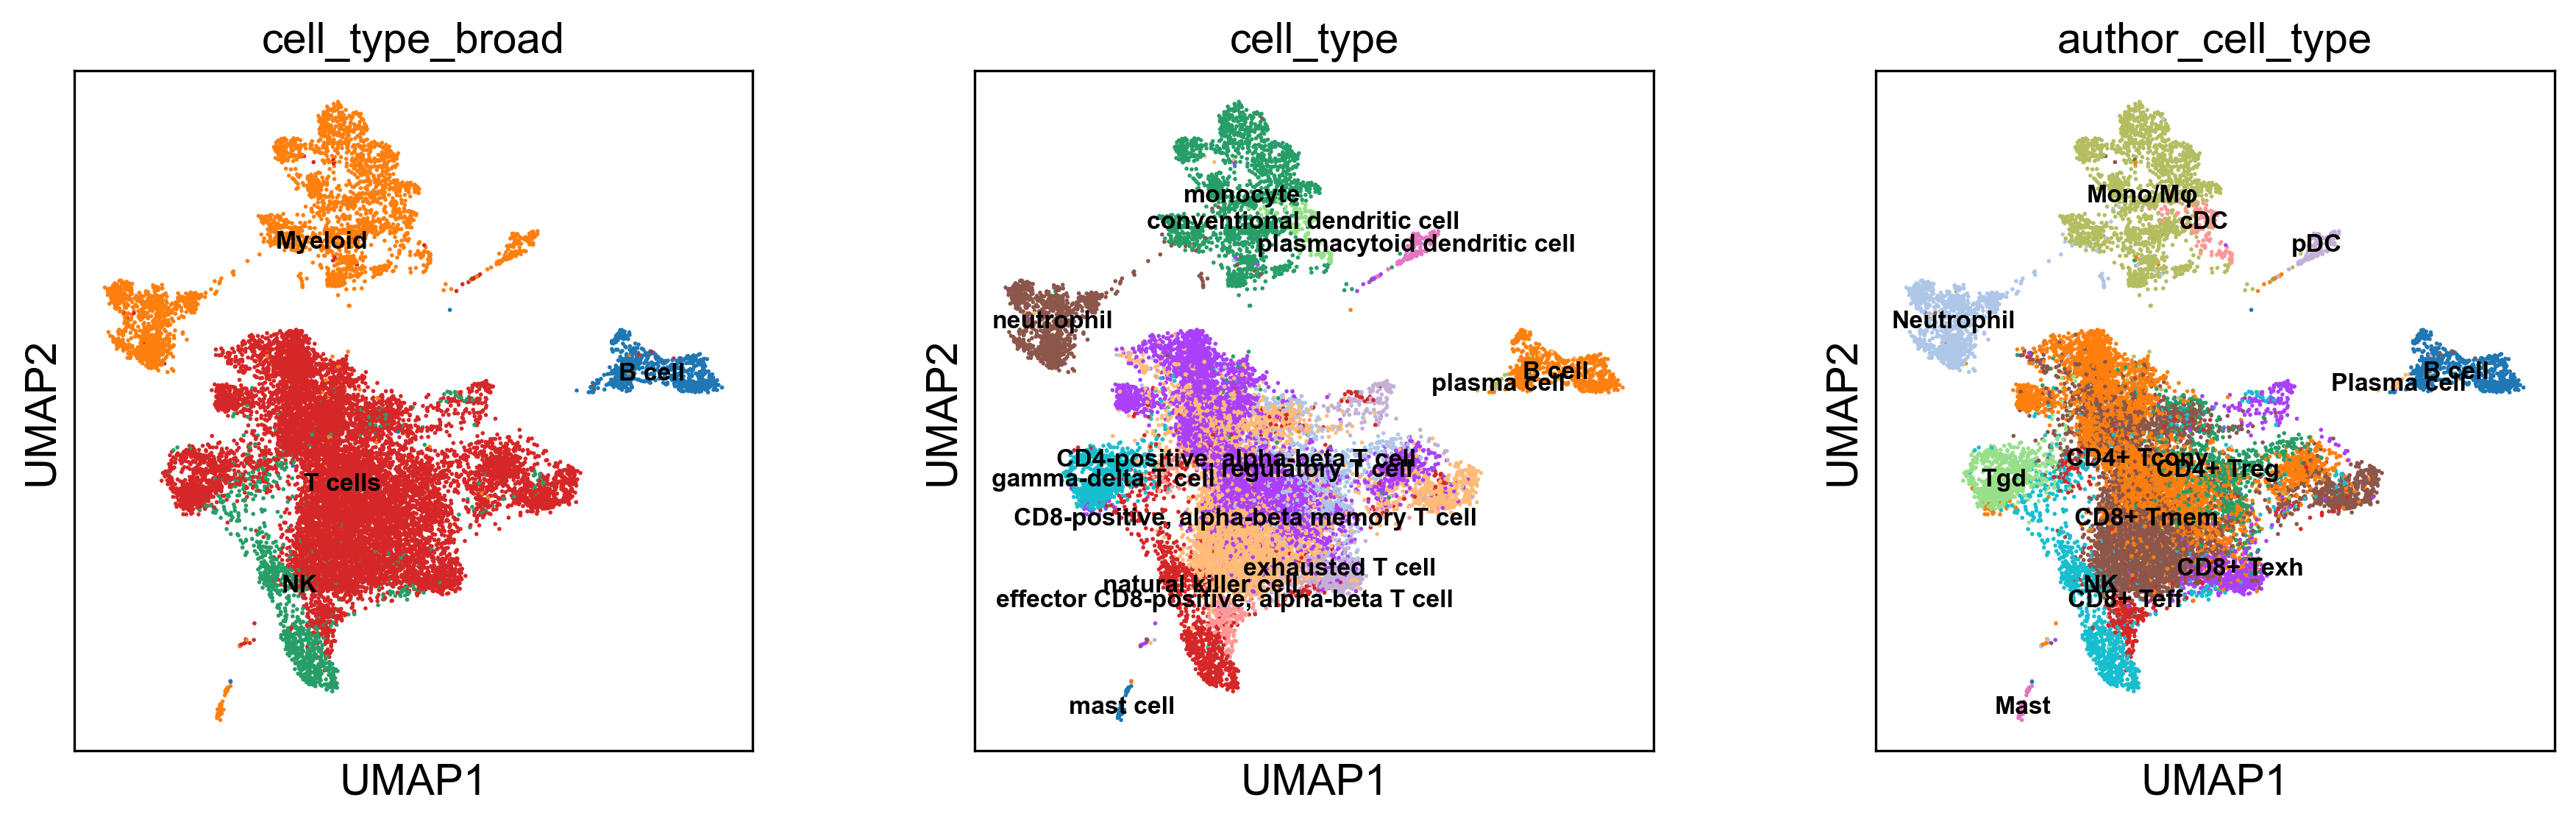

In [31]:
# Visualize author original cell type
sc._settings.ScanpyConfig(verbosity='error')
sc.pl.umap(adata, color=['cell_type_broad','cell_type','author_cell_type'], legend_fontsize='xx-small', legend_loc='on data')

In [32]:
adata.obs['author_cell_type'].value_counts()

author_cell_type
CD4+ Tconv     4885
CD8+ Tmem      4320
Mono/Mφ        1657
NK             1104
Neutrophil     1023
CD4+ Treg       782
Tgd             745
B cell          660
CD8+ Texh       578
CD8+ Teff       387
cDC             155
pDC             116
Mast             43
Plasma cell      20
Name: count, dtype: int64

In [34]:
# Assign author cell type to clusters
immune_dict = {
    'CD4+ Tconv':['0','2','13'],
    'CD8+ Tmem':['1','4','3'],
    'Mono/Mφ':['8','16','12','15'],
    'NK':['7','14'],
    'Neutrophil':['5'],
    'CD4+ Treg':['6'],
    'Tgd':['9'],
    'B cell':['11'],
    'CD8+ Texh':['10','17'],
    'pDC':['18'],
    'Mast':['19']
}

In [37]:
for k,v in immune_dict.items():
    total_not_matching = 0
    print("cluster assignment: {}\t{}".format(k,v))
    for l in v:
        total_not_matching += len(adata.obs.loc[(adata.obs['leiden']==l) & (adata.obs['author_cell_type']!=k)])
    print("cell type persistency: {}\t{}\t{}".format(k, total_not_matching, len(adata.obs.loc[adata.obs['author_cell_type']==k])))
    print("-----------")

cluster assignment: CD4+ Tconv	['0', '2', '13']
cell type persistency: CD4+ Tconv	1132	4885
-----------
cluster assignment: CD8+ Tmem	['1', '4', '3']
cell type persistency: CD8+ Tmem	1409	4320
-----------
cluster assignment: Mono/Mφ	['8', '16', '12', '15']
cell type persistency: Mono/Mφ	197	1657
-----------
cluster assignment: NK	['7', '14']
cell type persistency: NK	384	1104
-----------
cluster assignment: Neutrophil	['5']
cell type persistency: Neutrophil	11	1023
-----------
cluster assignment: CD4+ Treg	['6']
cell type persistency: CD4+ Treg	466	782
-----------
cluster assignment: Tgd	['9']
cell type persistency: Tgd	92	745
-----------
cluster assignment: B cell	['11']
cell type persistency: B cell	35	660
-----------
cluster assignment: CD8+ Texh	['10', '17']
cell type persistency: CD8+ Texh	379	578
-----------
cluster assignment: pDC	['18']
cell type persistency: pDC	13	116
-----------
cluster assignment: Mast	['19']
cell type persistency: Mast	17	43
-----------
